# Kaggle data: Women’s Clothing E-Commerce dataset

Context
Welcome. This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.

Content
This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

- Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
- Age: Positive Integer variable of the reviewers age.
- Title: String variable for the title of the review.
- Review Text: String variable for the review body.
- Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
- Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
- Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
- Division Name: Categorical name of the product high level division.
- Department Name: Categorical name of the product department name.
- Class Name: Categorical name of the product class name.

Dataset can be downloaded from here: https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

In [1]:
!pip install spacy

In [2]:
!python -m spacy download en


✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [3]:
!pip install pyLDAvis

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Reading and investigating the data

In [6]:
data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', index_col=0) 
print("The shape of data=",data.shape)
data.head()

The shape of data= (23486, 10)


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


# Unsupervised learning methods and Natural Language Processing


In [7]:
#Let's go for an NLP problem and try to cluster the textual feedback and find topics from Review Text.

In [8]:
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [11]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['do','get','also'])

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(bigram_mod, texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [12]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
data['Review Text'].head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Absolutely wonderful - silky and sexy and comfortable
1                                                                                                                                                                                                         Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is tr

In [14]:
#how many review texts are there
print(len(data))

23486


## Create a training dataset

In [15]:
#remove the empty rows
data_non_nulls = data[data['Review Text'].isnull() == False]
data_non_nulls.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


In [16]:
print(len(data_non_nulls))

22641


In [17]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


## Preprocess the data

In [ ]:
#Take a smaller dataset so it runs in colab
#data_small = data_non_nulls[0:8000]
#data_small.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Age Group
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates,30-35
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses,30-35
2,2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses,60-70
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,50-60
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,40-50


In [ ]:
#print(len(data_small))

8000


In [18]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [19]:
def preprocess(data):
    # Convert to list
    data =data['Review Text'].values.tolist()

    # Remove Emails
    data = [re.sub('\\S*@\\S*\\s?', '', sent) for sent in data]

    # Remove new line characters
    data = [re.sub('\\s+', ' ', sent) for sent in data]

    # Remove distracting single quotes
    data = [re.sub("\'", "", sent) for sent in data]


    #pprint(data[:1])

    data_words = list(sent_to_words(data)) 

    # Build the bigram and trigram models
    bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
    #print(bigram)
    trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

    # Faster way to get a sentence clubbed as a trigram/bigram
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram_mod = gensim.models.phrases.Phraser(trigram)
    #print(trigram_mod[bigram_mod[data_words[0]]])

    #trigram_mod = gensim.models.phrases.Phraser(trigram)
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

    # Do lemmatization keeping only noun,vb
    data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'VERB'])#'ADV','ADJ'

    # Form Bigrams
    data_words_bigrams = make_bigrams(bigram_mod, data_lemmatized)
    #print(data_words_bigrams[0])

    # Remove Stop Words
    data_lemmatized = remove_stopwords(data_words_bigrams)

    #print(data_lemmatized[:1])
    return data_lemmatized
data_lemmatized = preprocess(data_non_nulls)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


# Create the corpus

In [20]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

#Store dictionary
"""import pickle

# Store data (serialize)
with open('id2word.pickle', 'wb') as handle:
    pickle.dump(id2word, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Load data (deserialize)
with open('id2word.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)

id2word == unserialized_data """

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])



[[(0, 1)]]


In [21]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('silky', 1)]]

# Get a baseline model with Latent Dirichlet Allocation (LDA)

Documentation for LDA: https://radimrehurek.com/gensim/models/ldamodel.html

Loosely following this blog:  https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0

In [27]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=9, 
                                           random_state=42,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto')

In [28]:
# Print the Keyword in the  topics
pprint(lda_model.print_topics())
#Not good enough!!!

[(0,
  '0.118*"love" + 0.112*"wear" + 0.080*"color" + 0.035*"feel" + 0.034*"work" + '
  '0.032*"material" + 0.032*"sweater" + 0.031*"shirt" + 0.027*"purchase" + '
  '0.026*"sleeve"'),
 (1,
  '0.111*"arm" + 0.055*"lace" + 0.048*"bra" + 0.047*"belt" + 0.046*"hole" + '
  '0.039*"pull" + 0.035*"strap" + 0.034*"cami" + 0.024*"roll" + 0.017*"lady"'),
 (2,
  '0.131*"fabric" + 0.104*"make" + 0.064*"waist" + 0.052*"cut" + '
  '0.045*"picture" + 0.043*"shoulder" + 0.034*"bottom" + 0.030*"shape" + '
  '0.025*"chest" + 0.024*"hip"'),
 (3,
  '0.129*"pant" + 0.106*"pair" + 0.037*"embroidery" + 0.034*"part" + '
  '0.026*"wardrobe" + 0.023*"seam" + 0.021*"help" + 0.021*"crop" + '
  '0.017*"thigh" + 0.015*"thought"'),
 (4,
  '0.340*"dress" + 0.074*"skirt" + 0.032*"line" + 0.026*"bust" + 0.025*"hit" + '
  '0.025*"reviewer" + 0.020*"knee" + 0.014*"sell" + 0.013*"bite" + '
  '0.012*"heel"'),
 (5,
  '0.096*"size" + 0.087*"fit" + 0.059*"would" + 0.045*"order" + 0.041*"buy" + '
  '0.039*"go" + 0.034*"try" + 

# Evaluate model

In [29]:
# Compute Baseline Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3119178569068085


# Try to find a good amount of topics

In [30]:
#The amount of clusters that would maximize the coherence score with this dataset while keeping alpha and beta constant.
coherence_list = []
for k in range(2,9):
    #print('Round: '+str(k))
    Lda = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                         id2word=id2word,
                                         num_topics=k, 
                                         random_state=42,
                                         chunksize=100,
                                         passes=10,
                                         alpha=0.31,
                                         eta='symmetric')
    coherence_model_lda = CoherenceModel(model=Lda, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    cm = coherence_model_lda.get_coherence()                                          
    coherence_list.append((k,cm))
print(coherence_list)

[(2, 0.32423481376936464), (3, 0.3464263438308741), (4, 0.36237204347300483), (5, 0.380125560217348), (6, 0.3982035623883271), (7, 0.3734224060327396), (8, 0.38375893638735425)]


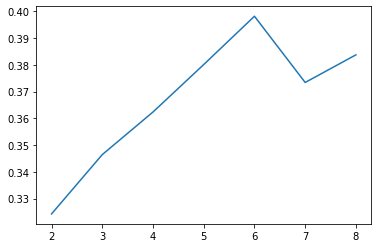

In [31]:
plt.plot(*zip(*coherence_list))
plt.show()

In [34]:
from operator import itemgetter
print(max(coherence_list,key=itemgetter(1))[0] )

6


In [35]:
k = max(coherence_list,key=itemgetter(1))[0] 

#Try to automatically find the best set of hyperparameters

model hyperparameters:

- Number of Topics (K)
- Dirichlet hyperparameter alpha: Document-Topic Density
- Dirichlet hyperparameter beta: Word-Topic Density

In [36]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [37]:

# Topics range
min_topics = k
max_topics = k+1
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(corpus)
corpus_sets = [ corpus]
corpus_title = ['100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    print(k,a,b,cv)
    #pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


6 0.01 0.01 0.35414264773335064
6 0.01 0.31 0.30228672852309907
6 0.01 0.61 0.3287052607248521
6 0.01 0.9099999999999999 0.35391164929553653
6 0.01 symmetric 0.3028531472317016
6 0.31 0.01 0.36233582587953855
6 0.31 0.31 0.375537157552117
6 0.31 0.61 0.38111431658258715
6 0.31 0.9099999999999999 0.3906245420171781
6 0.31 symmetric 0.3738809379339389
6 0.61 0.01 0.3969656848796166
6 0.61 0.31 0.4062319461986598
6 0.61 0.61 0.4170581162519786
6 0.61 0.9099999999999999 0.42525113904834994
6 0.61 symmetric 0.40920840715178897
6 0.9099999999999999 0.01 0.39128699988720356
6 0.9099999999999999 0.31 0.40427791379121203
6 0.9099999999999999 0.61 0.4177387503520917
6 0.9099999999999999 0.9099999999999999 0.4281663084830935
6 0.9099999999999999 symmetric 0.4021105801232954
6 symmetric 0.01 0.35964723120659065
6 symmetric 0.31 0.33701972292516275
6 symmetric 0.61 0.3605249919301355
6 symmetric 0.9099999999999999 0.32187126051864334
6 symmetric symmetric 0.33331164107517447
6 asymmetric 0.01 0.343

In [38]:
tuning = pd.DataFrame(model_results)
tuning.head()

,Validation_Set,Topics,Alpha,Beta,Coherence
0,100% Corpus,6,0.01,0.01,0.354143
1,100% Corpus,6,0.01,0.31,0.302287
2,100% Corpus,6,0.01,0.61,0.328705
3,100% Corpus,6,0.01,0.91,0.353912
4,100% Corpus,6,0.01,symmetric,0.302853


In [39]:
max_coh=tuning['Coherence'].max()
tuning[tuning['Coherence']==max_coh].head()

,Validation_Set,Topics,Alpha,Beta,Coherence
18,100% Corpus,6,0.91,0.91,0.428166


In [40]:
k=tuning[tuning['Coherence']==max_coh]['Topics'].values[0]
a=tuning[tuning['Coherence']==max_coh]['Alpha'].values[0]
b=tuning[tuning['Coherence']==max_coh]['Beta'].values[0]

In [41]:
#read the values from here and set: tuning[tuning['Coherence']==max_coh].head()
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)

In [42]:
pprint(lda_model.print_topics(num_words=15))

[(0,
  '0.185*"dress" + 0.062*"fabric" + 0.054*"make" + 0.045*"feel" + 0.044*"work" '
  '+ 0.028*"would" + 0.026*"material" + 0.017*"line" + 0.017*"pattern" + '
  '0.017*"cut" + 0.017*"shape" + 0.015*"body" + 0.013*"think" + 0.010*"figure" '
  '+ 0.010*"expect"'),
 (1,
  '0.152*"wear" + 0.067*"buy" + 0.042*"shirt" + 0.027*"fall" + '
  '0.021*"purchase" + 0.021*"summer" + 0.020*"time" + 0.018*"piece" + '
  '0.018*"day" + 0.016*"compliment" + 0.015*"legging" + 0.014*"receive" + '
  '0.013*"jacket" + 0.013*"wash" + 0.011*"go"'),
 (2,
  '0.093*"top" + 0.024*"shoulder" + 0.024*"design" + 0.020*"side" + '
  '0.019*"arm" + 0.019*"bottom" + 0.018*"bit" + 0.018*"detail" + 0.017*"print" '
  '+ 0.016*"back" + 0.014*"chest" + 0.014*"front" + 0.013*"button" + '
  '0.013*"material" + 0.013*"like"'),
 (3,
  '0.119*"fit" + 0.050*"length" + 0.046*"skirt" + 0.041*"waist" + 0.036*"jean" '
  '+ 0.032*"pant" + 0.026*"pair" + 0.026*"quality" + 0.020*"bit" + '
  '0.018*"price" + 0.015*"stretch" + 0.015*"hip"

In [43]:
# Visualize the topics
# https://cran.r-project.org/web/packages/LDAvis/vignettes/details.pdf
# Here a short legend to explain the vis:
# size of bubble: proportional to the proportions of the topics across the N total tokens in the corpus
# red bars: estimated number of times a given term was generated by a given topic
# blue bars: overall frequency of each term in the corpus
# note that the numbers in the bubbles do not mean the cluster numbers!

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.150662 -0.143703       1        1  20.867734
2      0.091205  0.123658       2        1  17.117164
1     -0.193607 -0.249568       3        1  16.138272
0      0.111153  0.103021       4        1  15.824068
4     -0.250893  0.188790       5        1  15.731139
3      0.091480 -0.022198       6        1  14.321622, topic_info=            Term          Freq         Total Category  logprob  loglift
2          dress  11251.000000  11251.000000  Default  30.0000  30.0000
35          wear   9410.000000   9410.000000  Default  29.0000  29.0000
8           love   9364.000000   9364.000000  Default  28.0000  28.0000
70          look   8376.000000   8376.000000  Default  27.0000  27.0000
25          size   9091.000000   9091.000000  Default  26.0000  26.0000
105          fit   8489.000000   8489.000000  Default  25.0000  25.0000
45         color   6322.000000   6322.000000  Default  24.0000  24.0000
94           top   6115.000000   6115.000000  Default  23.0000  23.0000
1            buy   4202.000000   4202.000000  Default  22.0000  22.0000
10         order   4258.000000   4258.000000  Default  21.0000  21.0000
104       fabric   4579.000000   4579.000000  Default  20.0000  20.0000
106         make   3569.000000   3569.000000  Default  19.0000  19.0000
7         length   2772.000000   2772.000000  Default  18.0000  18.0000
13         would   5612.000000   5612.000000  Default  17.0000  17.0000
80           try   3262.000000   3262.000000  Default  16.0000  16.0000
111         feel   2784.000000   2784.000000  Default  15.0000  15.0000
58         skirt   2523.000000   2523.000000  Default  14.0000  14.0000
27          work   2700.000000   2700.000000  Default  13.0000  13.0000
40         shirt   2611.000000   2611.000000  Default  12.0000  12.0000
232      sweater   2533.000000   2533.000000  Default  11.0000  11.0000
153        waist   2257.000000   2257.000000  Default  10.0000  10.0000
101          run   2843.000000   2843.000000  Default   9.0000   9.0000
67            go   3724.000000   3724.000000  Default   8.0000   8.0000
184         jean   2013.000000   2013.000000  Default   7.0000   7.0000
91        sleeve   2044.000000   2044.000000  Default   6.0000   6.0000
79           see   2627.000000   2627.000000  Default   5.0000   5.0000
75          pant   1783.000000   1783.000000  Default   4.0000   4.0000
121         fall   1667.000000   1667.000000  Default   3.0000   3.0000
59         style   1591.000000   1591.000000  Default   2.0000   2.0000
212      picture   1554.000000   1554.000000  Default   1.0000   1.0000
25          size   9074.945845   9091.831770   Topic1  -2.1789   1.5651
10         order   4246.109066   4258.261020   Topic1  -2.9384   1.5641
80           try   3250.761990   3262.763894   Topic1  -3.2055   1.5633
12         store   1815.566511   1824.131659   Topic1  -3.7880   1.5623
101          run   2828.494176   2843.720183   Topic1  -3.3446   1.5616
131       review   1270.968385   1280.622489   Topic1  -4.1446   1.5594
21        medium   1363.689433   1374.855924   Topic1  -4.0742   1.5588
100     retailer   1871.429036   1893.796226   Topic1  -3.7577   1.5551
271         sale   1426.040070   1444.013875   Topic1  -4.0295   1.5544
65        decide    473.610401    481.035103   Topic1  -5.1317   1.5514
90          sell    446.750545    454.990954   Topic1  -5.1901   1.5487
455         read    372.952473    380.016982   Topic1  -5.3707   1.5482
204     exchange    264.458165    271.191852   Topic1  -5.7144   1.5418
540    reference    475.575587    488.332123   Topic1  -5.1276   1.5405
79           see   2533.357449   2627.398642   Topic1  -3.4548   1.5305
663         base    237.542299    246.614882   Topic1  -5.8218   1.5295
289       sizing    275.050357    285.777966   Topic1  -5.6752   1.5287
654        agree    321.683185    334.316790   Topic1  -5.5186   1.52

Each bubble on the left-hand side plot represents a topic. The larger the bubble, the more prevalent is that topic.

A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.

A model with too many topics, will typically have many overlaps, small sized bubbles clustered in one region of the chart.

### Would be interesting to see results with the whole data. Also try keeping alpha and beta constant and changing k and then visualizing the coherence metric to figure out good k.

# Name the topics

In [58]:
topic_names ={0:'dresses and fabric', 1:'wearing and season', 2:'tops and tees', 3:'bottoms', 4:'love the style', 5:'size'} 
# This has to be a manual phase. Could try adding types of clothes to stopwords and see how the results would look like then.

#Use the model to get topics to the original dataframe

In [45]:
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


In [46]:
text_topics = data[['Review Text']]
text_topics = text_topics.dropna()
# Create Corpus
texts = preprocess(text_topics)
# Term Document Frequency
test_corpus = [id2word.doc2bow(text) for text in texts]
topics = [lda_model[test_corpus[i]] for i in range(len(text_topics))]

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [47]:
#this could be changed to work regardless of the amount of topics
def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    print(res)
    for topic_weight_pairs in topics_document:
        #add a new row to dataframe with 0 if no corresponding topic in this document
        zero =0
        one=0
        two=0
        three=0
        four=0
        five=0
        for a_tuple in topic_weight_pairs:
            if a_tuple[0]== 0:
                zero = a_tuple[1]
            elif a_tuple[0] ==1:
                one = a_tuple[1]
            elif a_tuple[0] ==2:
                two = a_tuple[1]
            elif a_tuple[0] ==3:
                three = a_tuple[1]
            elif a_tuple[0] ==4:
                four = a_tuple[1]
            elif a_tuple[0] ==5:
                five = a_tuple[1]
        #create a new row
        new_row = {0:zero, 1:one, 2:two, 3:three, 4:four, 5:five}
        #append row to the dataframe
        res = res.append(new_row, ignore_index=True)
        
    return res

res = topics_document_to_dataframe(topics,len(topic_names))
res.head()

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5]
Index: []


,0,1,2,3,4,5
0,0.262602,0.145300,0.154764,0.146813,0.145271,0.145250
1,0.115172,0.108066,0.047384,0.228501,0.154413,0.346464
2,0.267734,0.143702,0.183104,0.037430,0.034853,0.333177
3,0.100722,0.365815,0.065269,0.068323,0.278410,0.121461
4,0.055510,0.395935,0.199974,0.177529,0.115636,0.055416


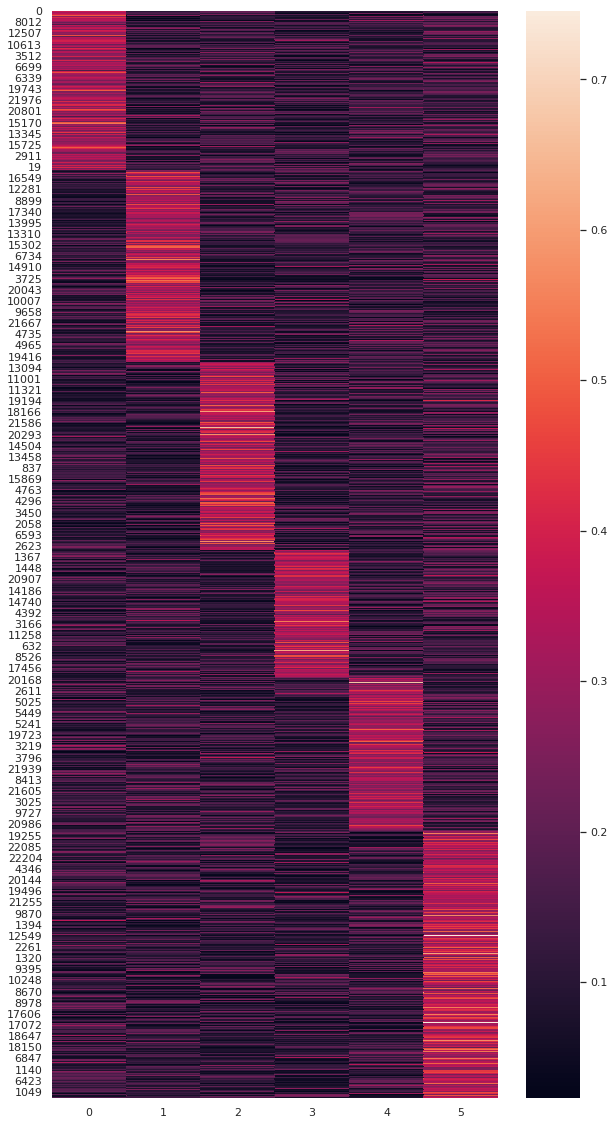

In [50]:
%matplotlib inline
sns.set(rc={'figure.figsize':(10,20)})
sns.heatmap(res.loc[res.idxmax(axis=1).sort_values().index])

Most of the reviews belong to cluster 5

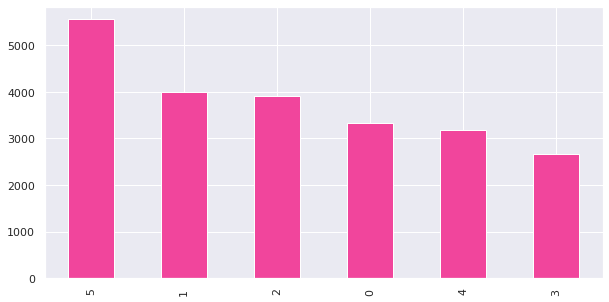

In [51]:
#Let's actually take a look at the counts
sns.set(rc={'figure.figsize':(10,5)})
res.idxmax(axis=1).value_counts().plot.bar(color='#f1459c')

In [53]:
#add the columns in res to data
topics = pd.concat([data_non_nulls.reset_index(),res], axis=1)
print(len(res))
print(len(data_non_nulls))
print(len(data))
print(len(topics))
topics.head()

22641
22641
23486
22641


,index,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,0,1,2,3,4,5
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates,0.262602,0.145300,0.154764,0.146813,0.145271,0.145250
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses,0.115172,0.108066,0.047384,0.228501,0.154413,0.346464
2,2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses,0.267734,0.143702,0.183104,0.037430,0.034853,0.333177
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,0.100722,0.365815,0.065269,0.068323,0.278410,0.121461
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,0.055510,0.395935,0.199974,0.177529,0.115636,0.055416


In [54]:
#remove the topic values from rows where there is no text:
#whether this is needed depend on whether we were previously working with original dataframe or the one where we always have a review (data_not_nulls)
def set_nans(row):
    if row['Review Text'] == None:
          row[[0,1,2,3,4,5]] = None
          return row
    else:
        return row
topics = topics.apply(lambda row: set_nans(row),axis=1)
topics.head()

,index,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,0,1,2,3,4,5
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates,0.262602,0.145300,0.154764,0.146813,0.145271,0.145250
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses,0.115172,0.108066,0.047384,0.228501,0.154413,0.346464
2,2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses,0.267734,0.143702,0.183104,0.037430,0.034853,0.333177
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,0.100722,0.365815,0.065269,0.068323,0.278410,0.121461
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,0.055510,0.395935,0.199974,0.177529,0.115636,0.055416


In [55]:
#create new columns topic and prob with the maximum topic column name and probability
topics['topic'] = topics[[0,1,2,3,4,5]].idxmax(axis=1)
topics['prob'] = topics[[0,1,2,3,4,5]].max(axis=1)

In [59]:
#change names of topics
topics_with_names = topics.rename(columns = topic_names)
topics_with_names['topic'] = topics_with_names['topic'].replace(topic_names)
topics_with_names.head()

,index,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,dresses and fabric,wearing and season,tops and tees,bottoms,love the style,size,topic,prob
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates,0.262602,0.145300,0.154764,0.146813,0.145271,0.145250,dresses and fabric,0.262602
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses,0.115172,0.108066,0.047384,0.228501,0.154413,0.346464,size,0.346464
2,2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses,0.267734,0.143702,0.183104,0.037430,0.034853,0.333177,size,0.333177
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,0.100722,0.365815,0.065269,0.068323,0.278410,0.121461,wearing and season,0.365815
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,0.055510,0.395935,0.199974,0.177529,0.115636,0.055416,wearing and season,0.395935


We have now created a topic model and added the found topics to the dataframe. The analysis could be taken to multiple directions from here. 

E.g. 
- it would be interesting to take a look at what reviews are given in each topic category.
- The category names could be adjusted.
- We could do the same analysis but for a dataset where we divide the reviews by sentences to get a sentence specific topic.
- We could find Products where size seems to be causing problems by combining the bad reviews for the topic "size"
- etc.